In [1]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import polyflexmd.data_analysis.plot.msd as msd_plot
import polyflexmd.data_analysis.theory.rouse as rouse
import polyflexmd.data_analysis.transform.msdlm as transform_msdlm

import pathlib

%load_ext autoreload
%autoreload 2

sns.set_style("darkgrid")

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick label
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick label
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
df_lm_traj = pd.read_csv("/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/17-EEA1_short-free_chain/ef6e4e76/data/processed/lm_trajectory.csv")
df_lm_traj

,t,kappa,molecule-ID,x,y,z
0,35000000,190.2,1,64.08960,-71.85820,111.38120
1,35000000,190.2,2,-5.71066,24.91510,-10.17250
2,35000000,190.2,3,94.17040,27.59290,73.70360
3,35000000,190.2,4,-82.25720,-77.68920,114.54390
4,35000000,190.2,5,24.08450,-70.85640,78.39410
...,...,...,...,...,...,...
42020495,835040000,190.2,496,-102.98210,-109.85800,272.69810
42020496,835040000,190.2,497,401.65692,-407.53180,-607.09143
42020497,835040000,190.2,498,-121.66440,8.13846,309.77470
42020498,835040000,190.2,499,-122.65780,-82.62560,522.66550


In [9]:
df_msdlm_17 = transform_msdlm.calculate_msdlm_mean_avg_over_t_start(df_lm_traj.loc[df_lm_traj["t"]<35000100], group_by_columns=["kappa"], n_workers=16)
df_msdlm_17

,,dr_N^2,delta dr_N^2
t,kappa,,
35000000,190.2,0.000000,0.000000e+00
35000001,190.2,0.000009,9.654490e-07
35000002,190.2,0.000031,3.226705e-06
35000003,190.2,0.000065,6.766006e-06
35000004,190.2,0.000112,1.161264e-05
...,...,...,...
35000095,190.2,0.035523,4.167755e-03
35000096,190.2,0.036504,4.280220e-03
35000097,190.2,0.037497,4.393279e-03


[None, None]

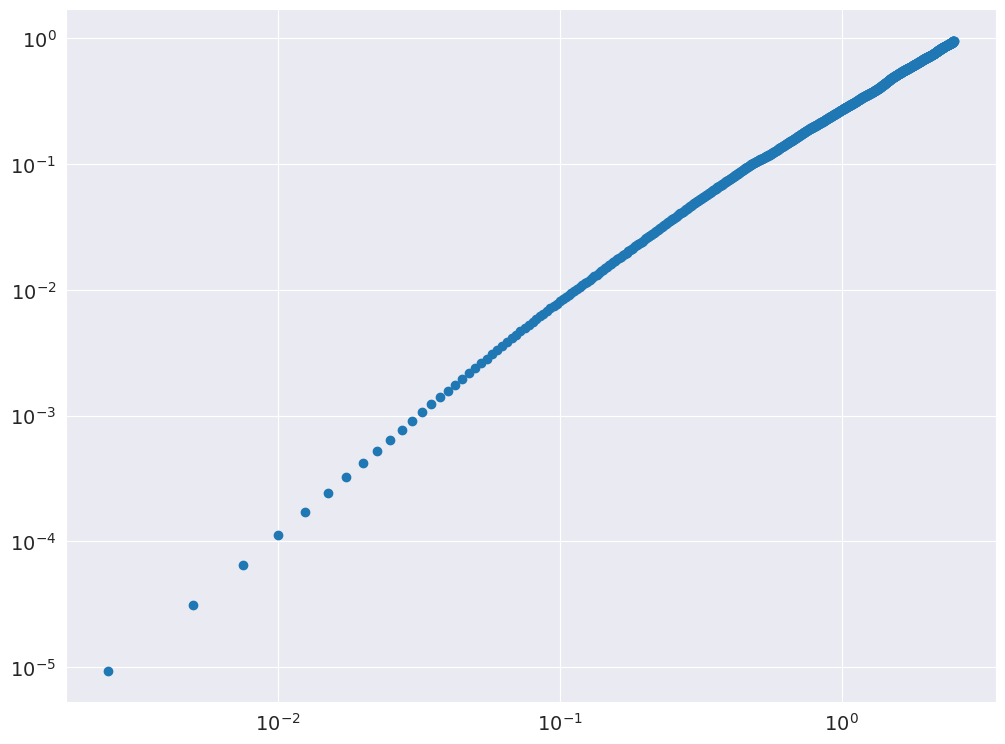

In [8]:
fig, ax = plt.subplots()

df_msdlm_17["t/LJ"] = df_msdlm_17.index * 0.0025
df_msdlm_17["t/LJ"] = df_msdlm_17["t/LJ"] - df_msdlm_17["t/LJ"].min()

ax.scatter(df_msdlm_17["t/LJ"], df_msdlm_17["dr_N^2"])

ax.set(xscale="log", yscale="log")

In [116]:
def read_msd_lm_df(path):
    df_msd_lm = pd.read_csv(path)
    df_msd_lm["t/LJ"] = df_msd_lm["t"] * 0.0025
    df_msd_lm["t/LJ"] = df_msd_lm["t/LJ"] - df_msd_lm["t/LJ"].min()
    return df_msd_lm

def get_ete_mean(path):
    df_ete = pd.read_csv(path)
    def calc_mean_R(df):
        R=0
        for dim in ["x", "y", "z"]:
            R+=(df[f"R_{dim}"]**2).mean()
        return R
    
    return df_ete.groupby("t").apply(calc_mean_R).rename("R^2")
    

N = 63
zeta = 1
b = .97
L_contour = N * b

experiments = [
    {
        "path": pathlib.Path(
            "/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/17-EEA1_short-free_chain/ef6e4e76"),
        "zeta_e": 1.0,
        "l_K": 6.02,
        "label": "EEA1-chain, $l_K/L=6.02$ "
    },
    {
        "path": pathlib.Path(
            "/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/19-EEA1_short-lp_bonded_like-free_chain/ef6e4e76"),
        "zeta_e": 1.0,
        "l_K": 0.6,
        "label": "EEA1-chain, $l_K/L=0.6$ (bonded-like)"
    },
    {
        "path": pathlib.Path(
            "/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-full_flex/20-full_flex-free_chain/ef6e4e76"),
        "zeta_e": 1.0,
        "l_K": 1 / N,
        "label": "Fully flexible chain"
    },
]



for experiment in experiments:
    print(f"Reading {experiment['path']}...")
    experiment["df_msdlm"] = read_msd_lm_df(experiment["path"] / "data" / "processed" / "lm_msd.csv")
    experiment["df_ete_mean"] = get_ete_mean(experiment["path"] / "data" / "processed" / "ete.csv")

Reading /beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/17-EEA1_short-free_chain/ef6e4e76...
Reading /beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/19-EEA1_short-lp_bonded_like-free_chain/ef6e4e76...
Reading /beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-full_flex/20-full_flex-free_chain/ef6e4e76...


3353.060740033601
1592.44146106041
58.80625


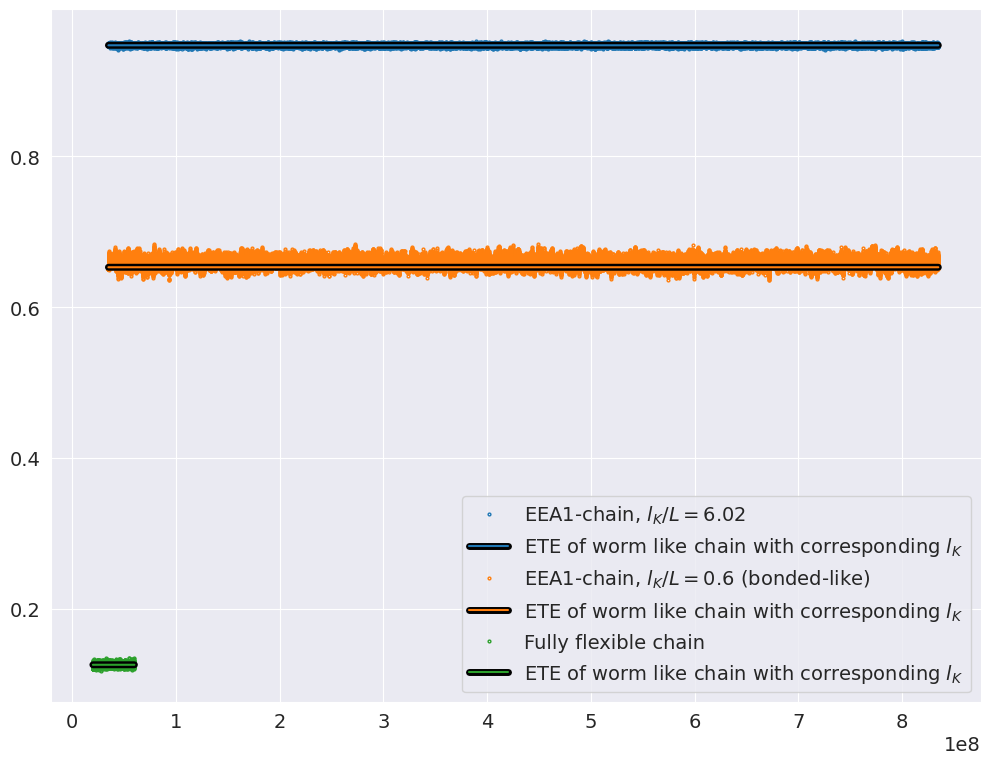

In [117]:
import matplotlib.patheffects as pe

fig, ax = plt.subplots()


for color, experiment in zip(sns.color_palette(), experiments):
    l_p = experiment["l_K"] * L_contour / 2
    R = 2*l_p*L_contour - 2*l_p**2 * (1 - np.exp(-L_contour / l_p))
    
    print(R)
    
    marker_kwargs = {}
    marker_kwargs["linestyle"] = 'None'
    marker_kwargs["markersize"] = 2
    marker_kwargs["markerfacecolor"] = 'none'
    marker_kwargs["markeredgecolor"] = color
    marker_kwargs["fillstyle"] = 'none'
    marker_kwargs["marker"] = "o"
    ax.plot(experiment["df_ete_mean"].index, np.sqrt(experiment["df_ete_mean"]) / L_contour, label=experiment["label"], color=color, **marker_kwargs)
    
    ax.plot(
        experiment["df_ete_mean"].index, 
        np.repeat(np.sqrt(R)/L_contour, len(experiment["df_ete_mean"])), 
        color=color,
        path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],
        label="ETE of worm like chain with corresponding $l_K$"
    )

ax.legend()


In [264]:
def get_rouse_msdlm_df(ts):
    tau_R = 1 / (3 * np.pi ** 2) * N ** 2 * b ** 2 * zeta
    R = N * b ** 2
    msdlm = rouse.rouse_msdlm(ts, R_sq=R, tau_R=tau_R, N=N)
    df_theor = pd.DataFrame({
        "t/LJ": ts,
        "dr_N^2": msdlm
    })
    return df_theor

df_rouse_msdlm = get_rouse_msdlm_df(np.logspace(np.log10(1e-3), np.log10(2e6), int(1e4), base=10))
df_rouse_msdlm

,t/LJ,dr_N^2
0,1.000000e-03,0.005969
1,1.002144e-03,0.005982
2,1.004293e-03,0.005995
3,1.006446e-03,0.006008
4,1.008604e-03,0.006021
...,...,...
9995,1.982938e+06,188870.837917
9996,1.987190e+06,189275.763540
9997,1.991451e+06,189681.557385
9998,1.995721e+06,190088.221312


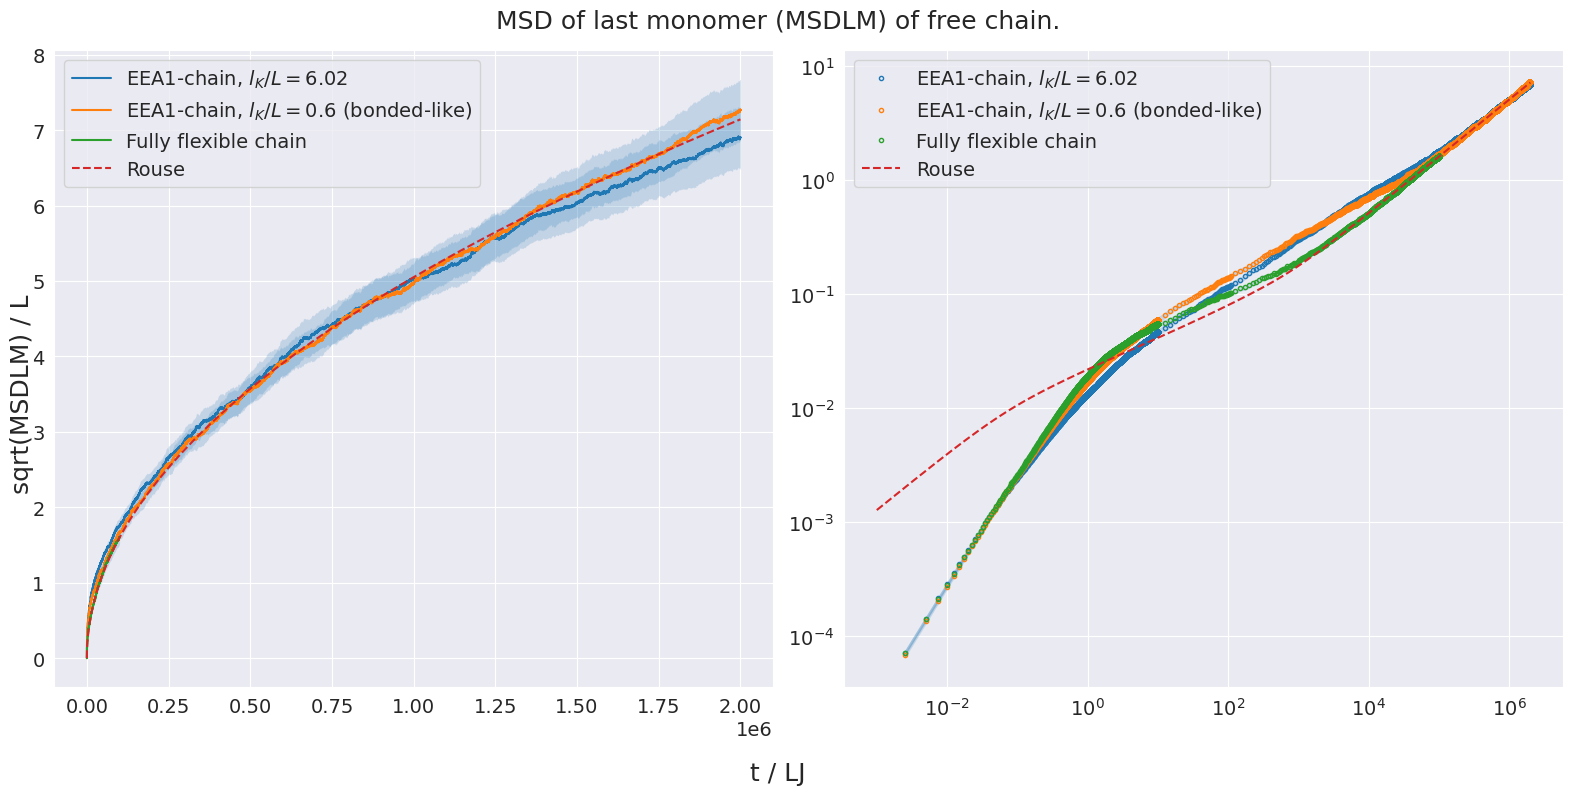

In [265]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

for ax, log in zip(axs, [False, True]):
    
    for experiment in experiments:
        msd_plot.plot_MSD(
            experiment["df_msdlm"],
            log_scale=log,
            l_K=experiment["l_K"],
            L_contour=L_contour,
            zeta=zeta,
            zeta_e=experiment["zeta_e"],
            col="dr_N^2",
            label=experiment["label"],
            ax=ax,
            title="",
            ylabel="",
            xlabel="",
            scatter=log,
            marker_size=3
        )
        
    ax.plot(df_rouse_msdlm["t/LJ"], np.sqrt(df_rouse_msdlm["dr_N^2"]) / L_contour, label="Rouse", linestyle="--")

    ax.legend()

fig.suptitle("MSD of last monomer (MSDLM) of free chain.")
fig.supylabel("sqrt(MSDLM) / L")
fig.supxlabel("t / LJ")
fig.tight_layout()

In [270]:
from scipy.optimize import curve_fit

def linregbin(df):
    if len(df) < 3:
        return pd.Series([np.NAN, np.NAN], index=["alpha", "delta alpha"])
    f = lambda x, k: k*x
    xs = np.log10(df["t/LJ"])
    ys = np.log10(df["dr_N^2"])
    xs = xs - xs.min()
    ys = ys - ys.min()
    popt, pcov = curve_fit(f, xs, ys, p0=(1.0,))
    delta_alpha = np.sqrt(np.diag(pcov)[0]) * 3
    return pd.Series([popt[0], delta_alpha], index=["alpha", "delta alpha"])
    
def calculate_msd_alpha_df(df_msdlm: pd.DataFrame, n_bins: int):
    bins = np.logspace(
        np.log10(df_msdlm["t/LJ"].iloc[1] / 10),
        np.log10(df_msdlm["t/LJ"].max()),
        n_bins,
        base=10
    ).tolist()
    binned_idx = pd.cut(df_msdlm["t/LJ"], bins=bins, precision=5, include_lowest=True)
    ks =  df_msdlm.groupby(binned_idx).apply(linregbin)
    ks.index = ks.index.map(lambda x: x.left).astype(float)
    return ks
    #msdlm_avg = df_msdlm.groupby(binned_idx)["dr_N^2"].mean().dropna()
    #t = msdlm_avg.index.map(lambda x: x.left).astype(float)
    #log_r = np.log10(msdlm_avg)
    #log_t = np.log10(t)
    #dr = np.gradient(log_r, log_t)
    #return pd.Series(dr, index=t, name="alpha")

n_bins = 100

for experiment in experiments:
    experiment["alpha"] = calculate_msd_alpha_df(experiment["df_msdlm"], n_bins=n_bins)
    
alpha_rouse = calculate_msd_alpha_df(df_rouse_msdlm, n_bins)

experiments[0]["alpha"]

,alpha,delta alpha
t/LJ,,
2.400000e-04,NaN,NaN
3.147500e-04,NaN,NaN
3.962800e-04,NaN,NaN
4.989200e-04,NaN,NaN
6.281500e-04,NaN,NaN
...,...,...
6.322583e+05,0.953738,0.003562
7.960237e+05,0.971282,0.002269
1.002207e+06,0.876689,0.003427


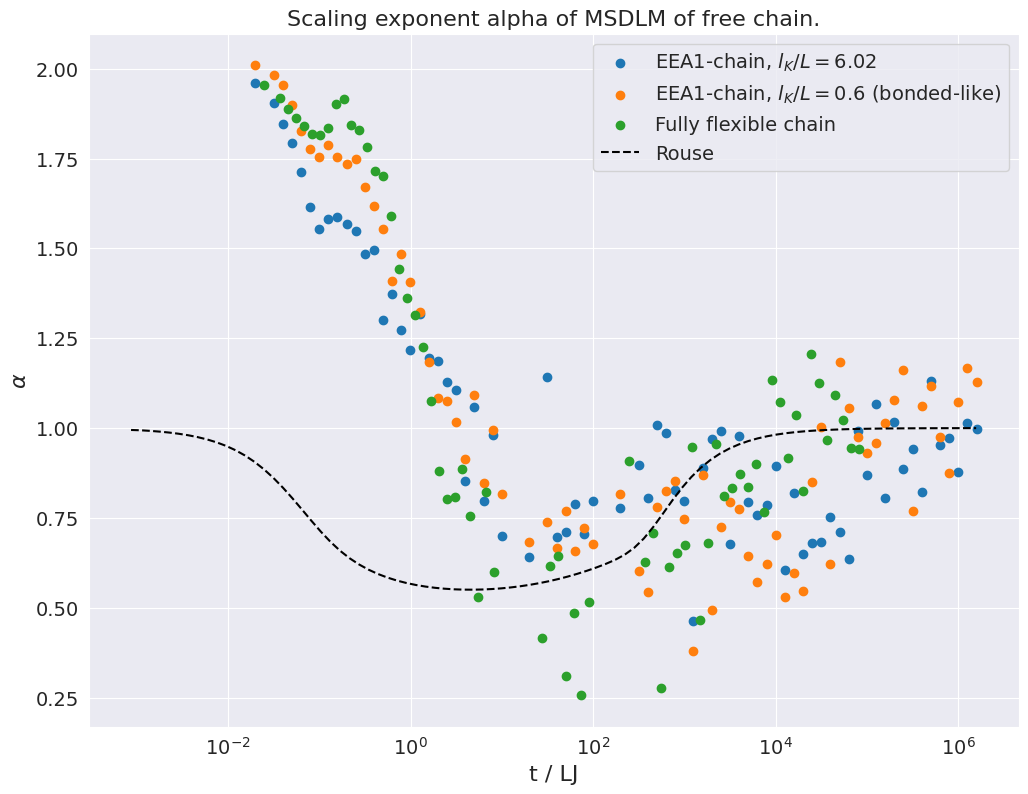

In [271]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots()

for color, experiment in zip(sns.color_palette(), experiments):
    ax.scatter(experiment["alpha"].index, experiment["alpha"]["alpha"], label=experiment["label"], color=color)

ax.plot(alpha_rouse.index, alpha_rouse["alpha"], linestyle="--", label="Rouse", color="black")

ax.set(xscale="log", xlabel="t / LJ", ylabel="$\\alpha$", title="Scaling exponent alpha of MSDLM of free chain.")
ax.legend()